## Prodigy Internship by Mahalakshmi
## Task 5 - U.S Accident dataset
## Problem Statement
Analyse traffic accident data to identify pattern related to road condition,weather,and time of day.Visualoze accident Hotspots and contributing factors

## Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
dataset = pd.read_csv('US_Accidents_March23.csv')

In [22]:
dataset.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [23]:
dataset.shape

(7728394, 46)

In [24]:
dataset.isnull().sum()*100/len(dataset)

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

In [25]:
# Dropping columns with less percentage of data
dataset = dataset.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)','ID','Start_Lat','Start_Lng'],axis=1)
dataset.columns

Index(['Source', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [26]:
dataset.Source.unique()

array(['Source2', 'Source3', 'Source1'], dtype=object)

In [27]:
#Converting Time figures from abject type to datetime64 type
dataset['Start_Time']=pd.to_datetime(dataset['Start_Time'],format='%Y-%m-%d %H:%M:%S')
dataset['End_Time']=pd.to_datetime(dataset['End_Time'],format='%Y-%m-%d %H:%M:%S')
dataset.head()

,Source,Severity,Start_Time,End_Time,Distance(mi),Description,Street,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Night,Night,Night,Night
1,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,...,False,False,False,False,False,False,Night,Night,Night,Day
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,...,False,False,False,False,True,False,Night,Night,Day,Day
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Night,Day,Day,Day
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,...,False,False,False,False,True,False,Day,Day,Day,Day


In [28]:
#Generating the target variable
dataset['elapsed_time'] = dataset['End_Time'] - dataset['Start_Time']
dataset['elapsed_time'] = dataset['elapsed_time']/np.timedelta64(1,'m')
dataset.head()

,Source,Severity,Start_Time,End_Time,Distance(mi),Description,Street,City,County,State,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,...,False,False,False,False,False,Night,Night,Night,Night,314.0
1,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,...,False,False,False,False,False,Night,Night,Night,Day,30.0
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,...,False,False,False,True,False,Night,Night,Day,Day,30.0
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,...,False,False,False,False,False,Night,Day,Day,Day,30.0
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,...,False,False,False,True,False,Day,Day,Day,Day,30.0


In [29]:
#Dropping inconsistent Values
dataset = dataset.drop(dataset.loc[dataset.elapsed_time<0].index)

In [30]:
dataset.groupby(['Source','Severity'])['elapsed_time'].describe(percentiles = [0.20,0.25,0.75,0.80,0.95])


count         mean           std        min        20%  \
Source  Severity                                                               
Source1 1           28206.0    58.957127   3130.037925  15.000000  15.000000   
        2         3945613.0   727.069680  17811.190053   2.000000  65.050000   
        3          161528.0   219.387244   4651.368730   8.933333  29.333333   
        4          190285.0  1804.168190  28464.139345   6.600000  29.900000   
Source2 1           35060.0    50.246548     28.119828  17.550000  29.666667   
        2         2148978.0    54.166968    251.408621   1.916667  29.700000   
        3         1107062.0    54.282239    288.934582   1.216667  29.550000   
        4           14273.0   118.053140    113.589751  19.316667  46.440000   
Source3 1            4100.0    48.428407     19.617313  22.883333  29.730000   
        2           62390.0    59.093225     38.378733  18.683333  29.716667   
        3           30747.0    54.396099     38.014097  11.600000  29.583333   
        4             152.0   108.318860     92.395712  26.933333  44.466667   

                        25%         50%         75%         80%         95%  \
Source  Severity                                                              
Source1 1         15.000000   34.966667   45.000000   60.000000   79.966667   
        2         75.233333  106.500000  164.166667  200.750000  401.900000   
        3         29.500000   49.291667  360.000000  360.000000  360.000000   
        4         60.000000  131.450000  360.000000  360.000000  417.083333   
Source2 1         29.733333   44.900000   59.783333   60.600000   91.083333   
        2         29.750000   44.716667   60.216667   69.216667  117.900000   
        3         29.616667   44.366667   59.666667   61.200000  119.516667   
        4         58.966667   89.283333  143.900000  164.710000  304.896667   
Source3 1         29.766667   44.900000   59.800000   59.866667   80.200833   
        2         29.783333   46.150000   74.483333   76.466667  123.292500   
        3         29.650000   44.616667   61.216667   74.566667  120.061667   
        4         45.108333   73.083333  140.037500  163.590000  296.002500   

                           max  
Source  Severity                
Source1 1         5.256600e+05  
        2         2.812939e+06  
        3         7.826096e+05  
        4         1.579259e+06  
Source2 1         7.847333e+02  
        2         3.369600e+05  
        3         1.220298e+05  
        4         6.730583e+03  
Source3 1         2.671333e+02  
        2         1.542133e+03  
        3         9.852333e+02  
        4         5.876167e+02

In [31]:
dataset['day_of_week']=dataset['Start_Time'].dt.weekday
dataset['hour_of_day']=dataset['Start_Time'].dt.hour
dataset['month_of_year']=dataset['Start_Time'].dt.month

## Visualization

In [32]:
#Correlation

#plt.figure(figsize=(12, 6))
#df.drop(['id'],axis=1, inplace=False)
#corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
#ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.2, cmap="YlGnBu")

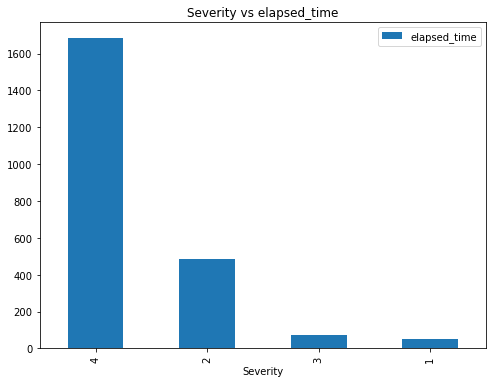

In [33]:
df = pd.DataFrame(dataset.groupby(['Severity'])['elapsed_time'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Severity vs elapsed_time')
plt.show()

In [38]:
df1= dataset[dataset.Source=='Source1']
df2= dataset[dataset.Source=='Source2']
df3= dataset[dataset.Source=='Source3']

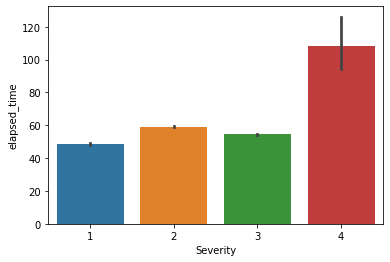

In [39]:
sns.barplot(x='Severity', y='elapsed_time', data=df3)

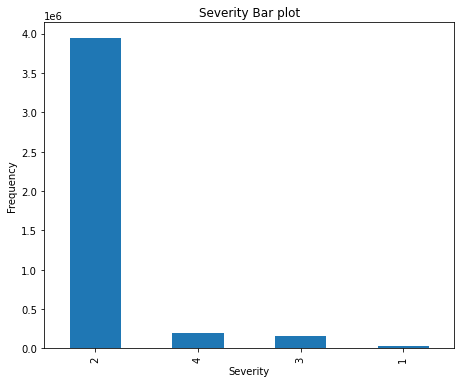

In [40]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,3)
plt1 = df1.Severity.value_counts().plot(kind='bar')
plt.title('Severity Bar plot')
plt1.set(xlabel = 'Severity', ylabel='Frequency')

plt.show()

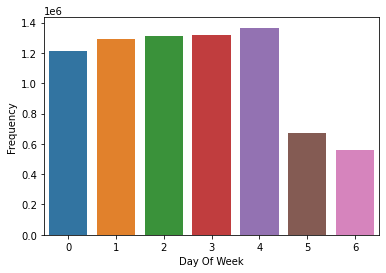

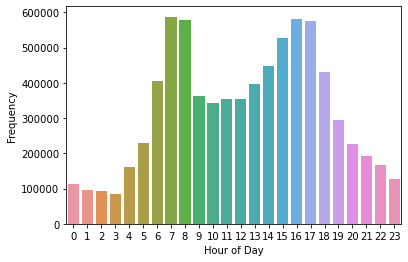

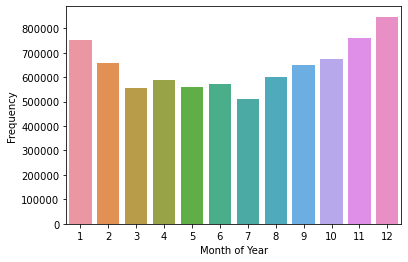

In [41]:
sns.countplot(dataset['day_of_week'])
plt.xlabel('Day Of Week')
plt.ylabel('Frequency')
plt.show()

sns.countplot(dataset['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()


sns.countplot(dataset['month_of_year'])
plt.xlabel('Month of Year')
plt.ylabel('Frequency')
plt.show()

* Surprising behaviour on Sunday and Saturday
* Surprising behaviour in July

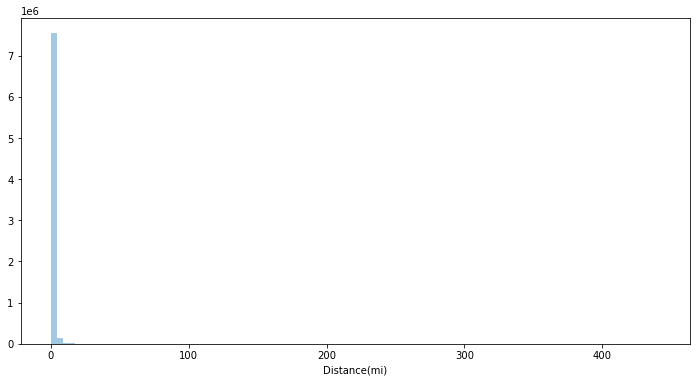

In [42]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['Distance(mi)'], kde = False, bins = 100)
plt.show()

* Outliers exist in distance > 10

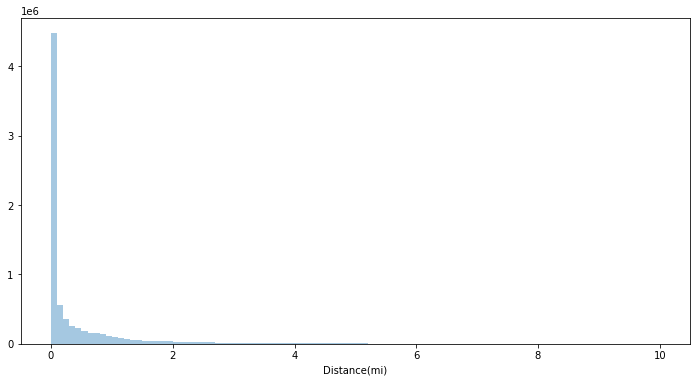

In [43]:
df= dataset[dataset['Distance(mi)']<10]
plt.figure(figsize=(12,6))
sns.distplot(df['Distance(mi)'], kde = False, bins = 100)
plt.show()

In [44]:
dataset.Street.nunique()

336306

In [ ]:
dd = dataset[~(dataset['Side']==' ')]
dd.Side.unique()

In [ ]:
sns.countplot(dd['Side'])
plt.xlabel('Side')
plt.ylabel('Frequency')
plt.show()

* Theory: Left hand drive in the USA, so right hand side more amount of accidents due to vision hinderence.

In [46]:
dataset.Zipcode.nunique()

825094

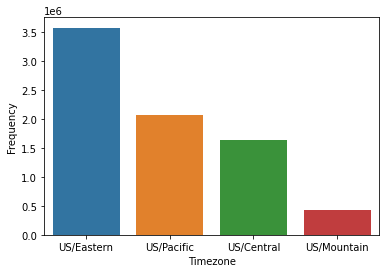

In [47]:
sns.countplot(dataset['Timezone'])
plt.xlabel('Timezone')
plt.ylabel('Frequency')
plt.show()

In [48]:
dataset.Airport_Code.nunique()

2045

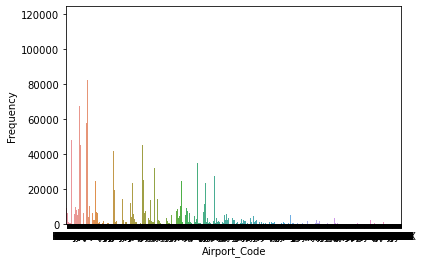

In [49]:
sns.countplot(dataset['Airport_Code'])
plt.xlabel('Airport_Code')
plt.ylabel('Frequency')
plt.show()

In [50]:
dataset.Weather_Timestamp.nunique()

941331

In [51]:
dataset['Temperature(F)'].value_counts()

 77.0     170991
 73.0     170898
 68.0     163767
 72.0     160498
 75.0     158448
           ...  
-12.6          1
-24.2          1
 132.8         1
-23.4          1
 143.6         1
Name: Temperature(F), Length: 860, dtype: int64

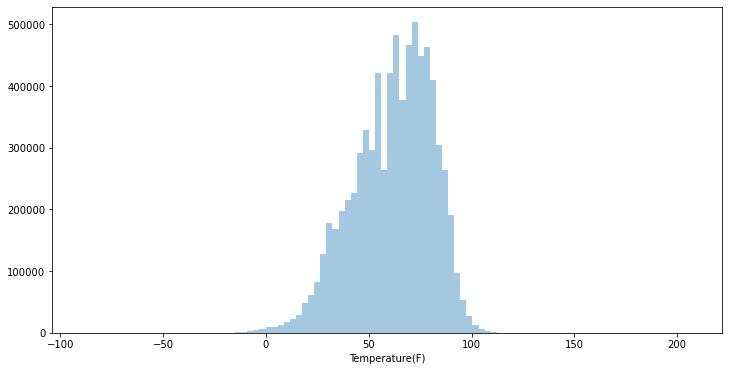

In [52]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['Temperature(F)'], kde = False, bins = 100)
plt.show()

* Most number of accidents occur at room temperature

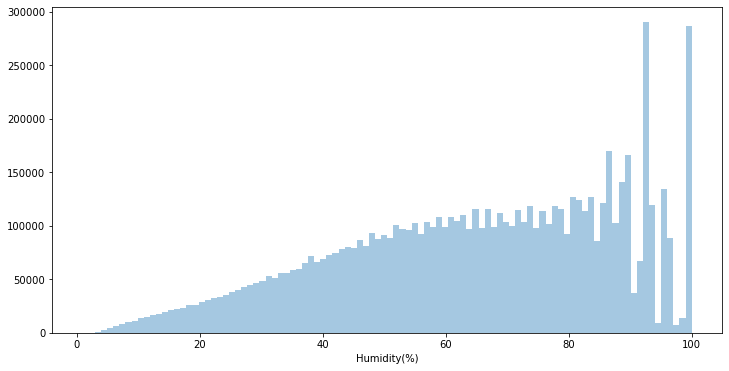

In [53]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['Humidity(%)'], kde = False, bins = 100)
plt.show()

* Number of Accidents spike up in the range of Humidity from 90 to 100.
* Humidity(%) has a linear relationship with the frequency of accidents.

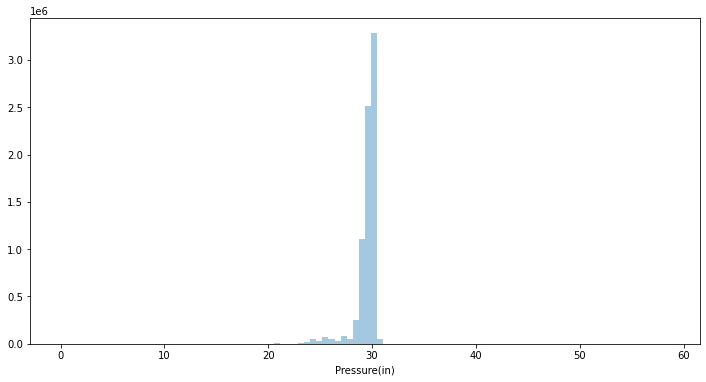

In [54]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['Pressure(in)'], kde = False, bins = 100)
plt.show()

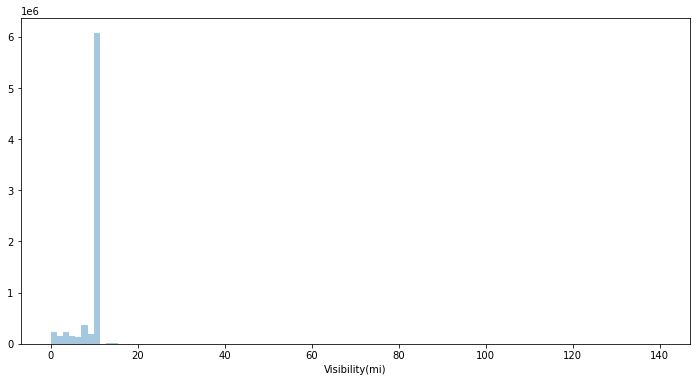

In [55]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['Visibility(mi)'], kde = False, bins = 100)
plt.show()

In [56]:
dataset['Wind_Direction'].value_counts()
#Drop it, this is bs

CALM        961624
S           419989
SSW         384840
W           383913
WNW         378781
NW          369352
Calm        368557
SW          364470
WSW         353806
SSE         349110
NNW         333427
N           307151
SE          294901
E           278914
ESE         268311
NE          258639
ENE         258474
NNE         255311
VAR         250566
South       177375
West        164751
North       153385
Variable    113996
East        103545
Name: Wind_Direction, dtype: int64

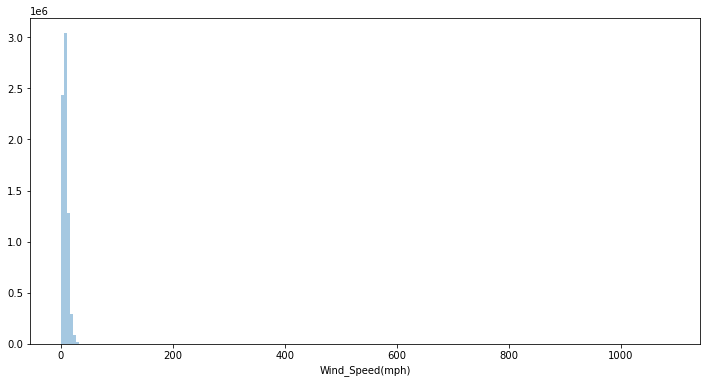

In [57]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['Wind_Speed(mph)'], kde = False, bins = 200)
plt.show()

In [58]:
dataset['Wind_Speed(mph)'].describe()

count    7.157161e+06
mean     7.685490e+00
std      5.424983e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64

In [59]:
d = dataset.copy()
dataset['Wind_Speed(kph)']=dataset['Wind_Speed(mph)']*1.61
dataset= dataset.drop(columns=['Wind_Speed(mph)'], axis=1)

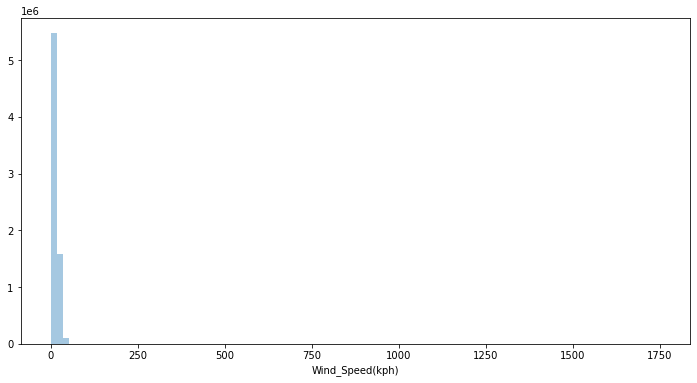

In [60]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['Wind_Speed(kph)'], kde = False, bins = 100)
plt.show()